In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ansur_male = pd.read_csv("https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv")
ansur_female = pd.read_csv("https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv")

ansur_df = pd.concat([ansur_male, ansur_female], ignore_index=True)

# remove non-numeric columns as t-SNE doesn't work with non-numeric data
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']

ansur_numeric = ansur_df.drop(non_numeric, axis = 1)

In [4]:
# set a learning rate
from sklearn.manifold import TSNE

# learning rates usually fall in the range of 10 to 1000
# a lower rate is more conservative in the models it tries
m = TSNE(learning_rate = 50)

tsne_features = m.fit_transform(ansur_numeric)
tsne_features[1:4, :]

/home/jeff/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ 20.107126 , -13.960187 ],
       [  4.2934995,  18.23746  ],
       [ -3.5333936, -14.745979 ]], dtype=float32)

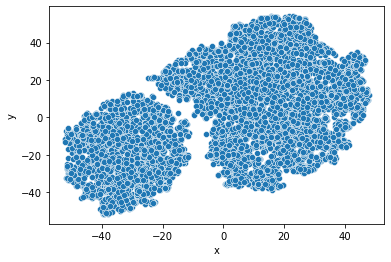

In [5]:
# reassign variables back to our original dataset
ansur_df['x'] = tsne_features[:,0]
ansur_df['y'] = tsne_features[:,1]

sns.scatterplot(x = 'x', y = 'y', data = ansur_df)
plt.show()

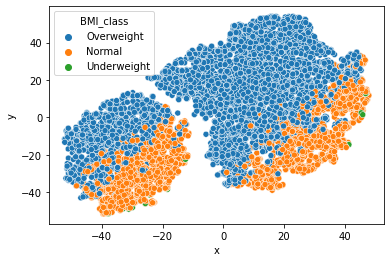

In [6]:
# replot but use bmi as a hue category
sns.scatterplot(x = 'x', y = 'y', hue = 'BMI_class', data = ansur_df)
plt.show()